In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('diabetes.txt', sep='\t', header=None).values[:, 1:]
training_labels = data[:,-1]
data = data[:,:-2]
print(training_labels.shape)
print(data.shape)

(768,)
(768, 8)


In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, training_labels, test_size = 0.5, stratify = training_labels)
train_acc_hist = []
test_acc_hist = []
n_esitmators = range(1,200)

In [27]:
%%time
for n in n_esitmators:
    clf = RandomForestClassifier(n_estimators=n, n_jobs = -1)
    clf = clf.fit(Xtrain, Ytrain)
    Ytest_pred = clf.predict(Xtest)
    test_acc_hist.append(np.mean(Ytest==Ytest_pred))
    Ytrain_pred = clf.predict(Xtrain)
    train_acc_hist.append(np.mean(Ytrain==Ytrain_pred))
    if n%10==0:
        print("Accuracy of %d is %lf%%"%(n, test_acc_hist[-1]*100))

Accuracy of 10 is 72.135417%
Accuracy of 20 is 72.656250%
Accuracy of 30 is 75.260417%
Accuracy of 40 is 75.260417%
Accuracy of 50 is 76.822917%
Accuracy of 60 is 77.343750%
Accuracy of 70 is 75.781250%
Accuracy of 80 is 77.083333%
Accuracy of 90 is 76.302083%
Accuracy of 100 is 77.604167%
Accuracy of 110 is 75.781250%
Accuracy of 120 is 77.083333%
Accuracy of 130 is 78.125000%
Accuracy of 140 is 77.864583%
Accuracy of 150 is 76.822917%
Accuracy of 160 is 77.083333%
Accuracy of 170 is 76.562500%
Accuracy of 180 is 77.083333%
Accuracy of 190 is 77.864583%
CPU times: user 1min 48s, sys: 29.9 s, total: 2min 18s
Wall time: 1min 58s


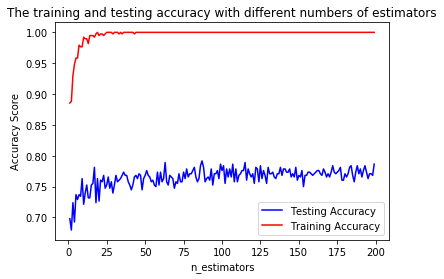

In [28]:
plt.ylabel('Accuracy Score')
plt.xlabel('n_estimators')
plt.title('The training and testing accuracy with different numbers of estimators')
plt.plot(n_esitmators, test_acc_hist, 'b', label = "Testing Accuracy")
plt.plot(n_esitmators, train_acc_hist, 'r', label = "Training Accuracy")
plt.legend()
plt.show()

In [29]:
print(np.argmax(test_acc_hist))
print(test_acc_hist[16])
print(np.mean(test_acc_hist))

86
0.78125
0.7648005653266332


In [25]:
%%time
n=86
clf = RandomForestClassifier(n_estimators=n, n_jobs = -1)
clf = clf.fit(Xtrain, Ytrain)
Ytest_pred = clf.predict(Xtest)
Ytrain_pred = clf.predict(Xtrain)
print("Train accuracy is %lf%%"%(np.mean(Ytrain==Ytrain_pred)))
print("Test accuracy is %lf%%"%(np.mean(Ytest==Ytest_pred)))


Train accuracy is 1.000000%
Test accuracy is 0.752604%
Wall time: 389 ms
